# XGBoost

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset and Cleaning it

In [ ]:
dataset = pd.read_csv('Train.csv')

#Filling missing values
#Converting strings into integer values
dataset['family history'] = dataset['family history'].map({'Yes': 1, 'No': 0})
dataset['Pre-existing symptoms'] = dataset['Pre-existing symptoms'].map({'?' : 0, '1': 1, 'NaN' : 0,})
dataset['Region'] = dataset['Region'].map({'Americas': 1, 'Europe': 0, 'East Mediterranean' : 2, 'Africa' : 3})
dataset['Pre-existing symptoms'] = dataset['Pre-existing symptoms'].astype('Int64')

dataset['Variant'] = dataset['Variant'].map({'Variant 1': 1, 'Variant 2': 2, 'Variant 3' : 3, 'Variant 4': 4, 'Variant 5': 5, 'Variant 6' : 6,})
for column in dataset.columns:
  dataset[column] = dataset[column].astype('float32')
dataset.fillna(0, inplace = True)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
test = pd.read_csv('Test.csv')
test.fillna(0, inplace = True)

#cleaning test set
test['family history'] = test['family history'].map({'Yes': 1, 'No': 0})
test['Region'] = test['Region'].map({'Americas': 1, 'Europe': 0, 'East Mediterranean' : 2, 'Africa' : 3})

#removing ID column
test.drop('ID', inplace=True, axis=1)

for column in test.columns:
  test[column] = test[column].astype('float32')

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(test, y[:177], test_size = 0.2, random_state = 0

In [ ]:
dataset.dtypes

ID                       float32
Cough                    float32
Shortness of breath      float32
Fatigue                  float32
body aches               float32
Headache                 float32
Loss of taste            float32
family history           float32
Loss of smell            float32
Nausea                   float32
Diarrhea                 float32
Misc Symptom 1           float32
Congestion               float32
Sore throat              float32
Region                   float32
Misc Symptom 2           float32
Misc Symptom 3           float32
Misc Symptom 4           float32
Misc Symptom 5           float32
Misc Symptom 6           float32
Misc Symptom 7           float32
Pre-existing symptoms    float32
Age                      float32
Variant                  float32
dtype: object

In [ ]:
dataset.head()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,Diarrhea,Misc Symptom 1,Congestion,Sore throat,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age,Variant
0,309.0,2.0,3.0,2.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,3.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,31.0,1.0
1,486.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,22.0,2.0
2,199.0,3.0,3.0,3.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,18.0,1.0
3,495.0,2.0,1.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,3.0
4,401.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training XGBoost on the Training set

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  0  0  0  0  0]
 [ 0 29  0  0  0  0]
 [ 0  0  8  1  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  0  2]]


0.9759036144578314

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


Accuracy: 91.80 %
Standard Deviation: 3.59 %


#Predicting Results from Test.csv

In [ ]:
id = pd.read_csv('Test.csv').iloc[:, 0].values

In [ ]:
print(test)

     Cough  Shortness of breath  ...  Pre-existing symptoms   Age
0      1.0                  2.0  ...                    0.0  17.0
1      3.0                  2.0  ...                    0.0  35.0
2      2.0                  3.0  ...                    0.0  28.0
3      2.0                  2.0  ...                    0.0  40.0
4      1.0                  2.0  ...                    0.0  34.0
..     ...                  ...  ...                    ...   ...
172    2.0                  1.0  ...                    0.0  47.0
173    2.0                  2.0  ...                    0.0  30.0
174    3.0                  2.0  ...                    0.0  37.0
175    2.0                  1.0  ...                    0.0  37.0
176    3.0                  2.0  ...                    0.0  15.0

[177 rows x 22 columns]


In [ ]:
y_pred = classifier.predict(test.values)
print(y_pred)

[5. 1. 1. 1. 4. 1. 1. 5. 5. 3. 6. 3. 6. 2. 2. 1. 2. 1. 6. 2. 4. 1. 5. 3.
 5. 1. 2. 2. 1. 6. 1. 1. 1. 4. 1. 3. 6. 1. 2. 4. 3. 4. 2. 2. 2. 3. 5. 5.
 6. 2. 1. 2. 4. 5. 3. 3. 1. 1. 2. 5. 5. 1. 5. 2. 1. 1. 2. 2. 1. 5. 1. 1.
 1. 2. 3. 1. 2. 1. 4. 4. 4. 2. 3. 5. 1. 3. 5. 2. 3. 2. 2. 1. 2. 1. 2. 5.
 3. 2. 2. 1. 2. 2. 1. 2. 2. 2. 3. 2. 4. 1. 1. 6. 4. 2. 2. 5. 1. 2. 2. 3.
 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 5. 2. 5. 3. 1. 2. 2. 1. 6. 1. 1.
 2. 1. 3. 2. 3. 1. 1. 1. 2. 4. 1. 2. 3. 2. 5. 1. 2. 3. 1. 2. 2. 2. 1. 4.
 2. 1. 1. 1. 1. 3. 2. 2. 1.]


In [ ]:
arr = []
c=0
for i in y_pred:

  if (i==1):
    abc = [(int)(id[c]),
            'Variant 1']
    c=c+1
    arr.append(abc)

  elif (i==2):
    abc = [(int)(id[c]),
            'Variant 2']
    c=c+1
    arr.append(abc)
  
  elif (i==3):
    abc = [(int)(id[c]),
            'Variant 3']
    c=c+1
    arr.append(abc)

  elif (i==4):
    abc = [(int)(id[c]),
            'Variant 4']
    c=c+1
    arr.append(abc)

  elif (i==5):
    abc = [(int)(id[c]),
            'Variant 5']
    c=c+1
    arr.append(abc)

  else:
    abc = [(int)(id[c]),
            'Variant 6']
    c=c+1
    arr.append(abc)

print(arr)

[[95, 'Variant 5'], [502, 'Variant 1'], [203, 'Variant 1'], [290, 'Variant 1'], [479, 'Variant 4'], [478, 'Variant 1'], [167, 'Variant 1'], [536, 'Variant 5'], [456, 'Variant 5'], [147, 'Variant 3'], [442, 'Variant 6'], [455, 'Variant 3'], [326, 'Variant 6'], [357, 'Variant 2'], [513, 'Variant 2'], [25, 'Variant 1'], [470, 'Variant 2'], [537, 'Variant 1'], [310, 'Variant 6'], [101, 'Variant 2'], [344, 'Variant 4'], [307, 'Variant 1'], [19, 'Variant 5'], [38, 'Variant 3'], [39, 'Variant 5'], [86, 'Variant 1'], [394, 'Variant 2'], [303, 'Variant 2'], [260, 'Variant 1'], [312, 'Variant 6'], [180, 'Variant 1'], [373, 'Variant 1'], [130, 'Variant 1'], [113, 'Variant 4'], [26, 'Variant 1'], [319, 'Variant 3'], [557, 'Variant 6'], [588, 'Variant 1'], [228, 'Variant 2'], [447, 'Variant 4'], [90, 'Variant 3'], [168, 'Variant 4'], [250, 'Variant 2'], [207, 'Variant 2'], [213, 'Variant 2'], [317, 'Variant 3'], [21, 'Variant 5'], [234, 'Variant 5'], [407, 'Variant 6'], [114, 'Variant 2'], [327, 'V

Taking output as csv file for Kaggle submission

In [ ]:
df = pd.DataFrame(arr)
df.to_csv('GDSC test results.csv', index=False)

##Exploratory Data Analysis

In [ ]:
dataset.describe()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,Diarrhea,Misc Symptom 1,Congestion,Sore throat,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age,Variant
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,290.992706,2.165049,1.941748,1.553398,0.094660,0.745146,0.701456,0.854369,0.783981,0.169903,1.274272,1.419903,0.905340,1.133495,0.691748,0.398058,0.480583,0.604369,0.973301,0.058252,0.689320,0.016990,37.308254,2.191748
std,166.180939,0.652110,0.698629,0.898533,0.428056,1.058209,1.011225,0.353165,0.873751,0.631891,1.158915,0.944129,1.139117,1.181423,0.940896,0.755706,0.826632,0.982217,1.163837,0.329425,1.013573,0.129392,14.135756,1.388037
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,153.750000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000
50%,288.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,2.000000
75%,428.250000,3.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,49.250000,3.000000
max,587.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,75.000000,6.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


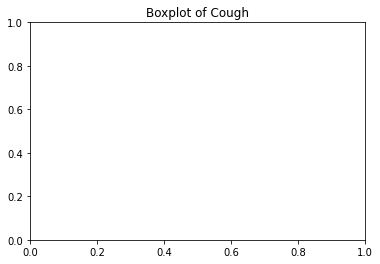

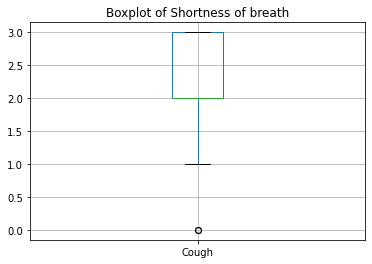

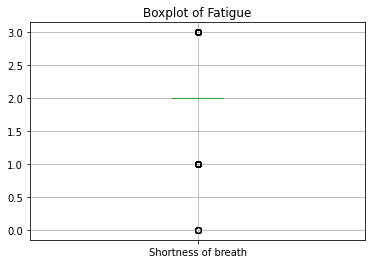

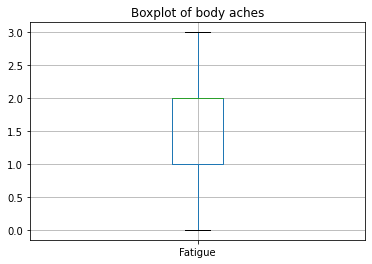

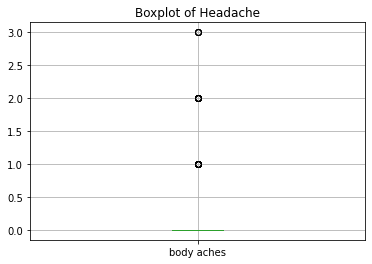

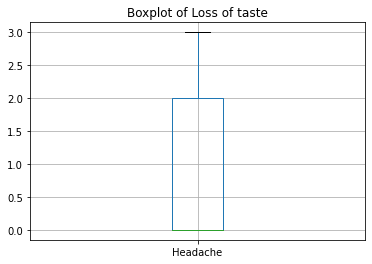

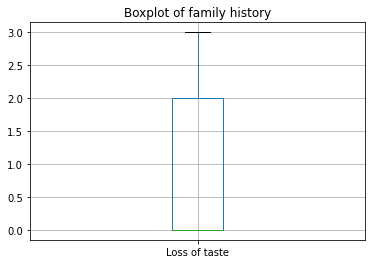

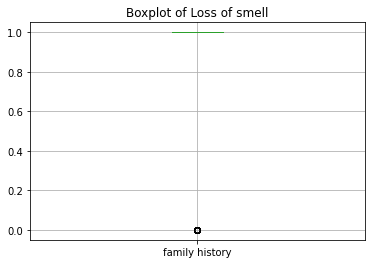

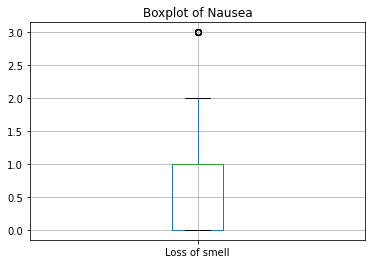

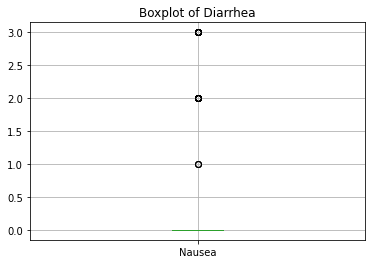

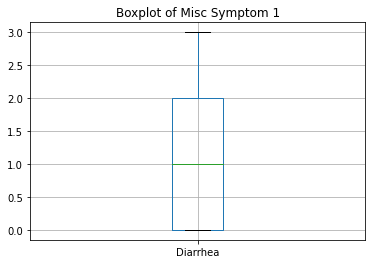

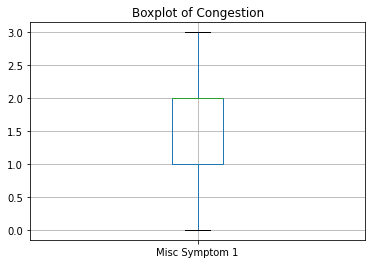

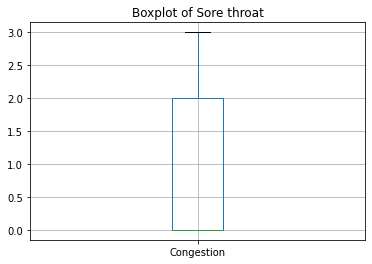

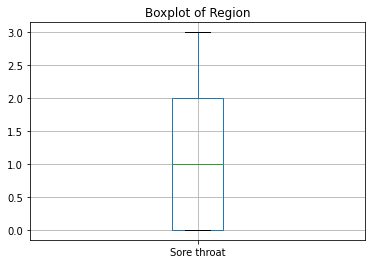

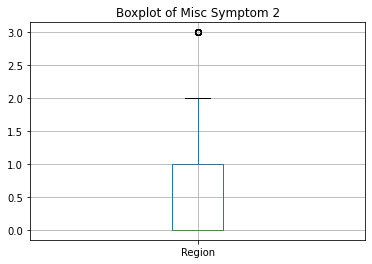

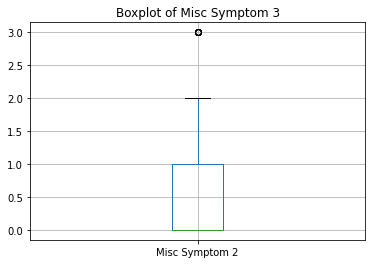

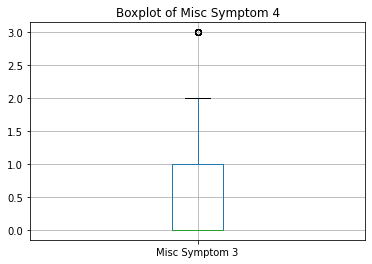

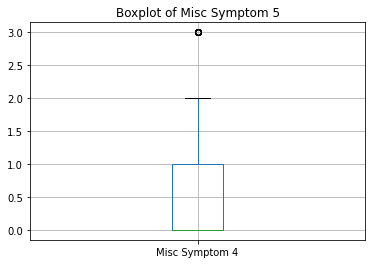

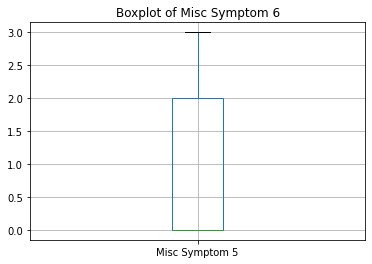

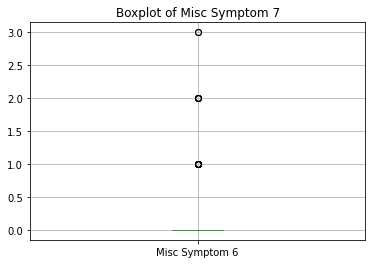

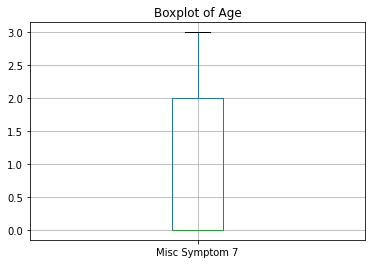

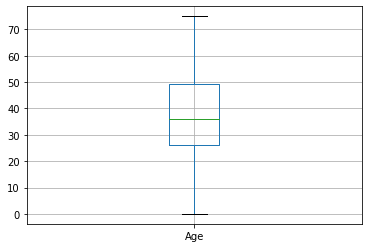

In [ ]:
for column in dataset.columns[1:-1].drop(['Pre-existing symptoms']):
    plt.title(f"Boxplot of {column}")
    plt.figure()
    dataset.boxplot([column])

In [ ]:
dataset.corr()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,Diarrhea,Misc Symptom 1,Congestion,Sore throat,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age,Variant
ID,1.000000,-0.065077,0.027031,-0.009440,-0.052835,0.049480,0.082516,0.013124,-0.003630,-0.041533,-0.032268,0.079233,0.045458,0.056244,0.110359,-0.050679,0.163134,0.053451,-0.052397,-0.000037,0.065914,0.022750,0.019960,-0.052914
Cough,-0.065077,1.000000,0.298867,0.080428,-0.073539,0.071681,0.071215,-0.096109,0.152401,-0.239454,0.042979,0.108466,0.034185,0.012387,0.071225,0.039162,-0.007581,0.045215,0.105202,-0.010886,0.096174,0.082028,-0.019258,-0.247404
Shortness of breath,0.027031,0.298867,1.000000,0.249152,-0.111692,0.223411,0.233624,-0.113357,0.222474,-0.313727,-0.145500,0.265877,0.289616,0.165681,0.279836,0.246800,0.170773,0.164893,-0.061765,-0.059224,0.190850,0.010975,0.027938,-0.440084
Fatigue,-0.009440,0.080428,0.249152,1.000000,-0.104900,0.355960,0.270639,-0.159452,-0.048803,-0.144577,-0.340046,0.301902,0.448288,0.340510,0.383577,0.244528,0.286391,0.397552,-0.362755,-0.109174,0.015589,0.065424,0.060862,-0.311586
body aches,-0.052835,-0.073539,-0.111692,-0.104900,1.000000,0.166187,-0.052594,-0.117819,-0.114333,0.039344,0.021107,-0.050428,-0.086366,-0.092405,-0.108608,-0.064115,-0.101373,-0.119040,-0.004682,0.806270,0.208147,-0.029108,-0.308825,0.415735
Headache,0.049480,0.071681,0.223411,0.355960,0.166187,1.000000,0.551727,-0.320907,0.216618,-0.178878,-0.563847,0.421529,0.692452,0.572208,0.529384,0.394908,0.446318,0.429455,-0.525116,0.133426,0.309370,0.031701,-0.026778,-0.425494
Loss of taste,0.082516,0.071215,0.233624,0.270639,-0.052594,0.551727,1.000000,-0.326424,0.213221,-0.186968,-0.548653,0.480763,0.712576,0.595541,0.555135,0.401046,0.582466,0.409917,-0.517429,-0.079137,0.281982,0.020265,0.018028,-0.534619
family history,0.013124,-0.096109,-0.113357,-0.159452,-0.117819,-0.320907,-0.326424,1.000000,-0.125851,0.111145,0.252390,-0.224793,-0.330703,-0.285684,-0.281868,-0.247208,-0.218067,-0.250670,0.256897,-0.115125,-0.153892,-0.052211,0.028509,0.191115
Loss of smell,-0.003630,0.152401,0.222474,-0.048803,-0.114333,0.216618,0.213221,-0.125851,1.000000,-0.241842,-0.179225,0.092528,0.275198,0.192996,0.288752,0.307415,0.157559,0.058938,-0.106177,-0.116784,0.102612,-0.053541,0.056229,-0.485363
Nausea,-0.041533,-0.239454,-0.313727,-0.144577,0.039344,-0.178878,-0.186968,0.111145,-0.241842,1.000000,-0.110304,-0.172894,-0.214219,0.178132,-0.185885,-0.141974,-0.128752,-0.150167,-0.152622,-0.035973,-0.183307,0.024124,-0.056270,0.523124


Text(0.5, 1.0, 'Histogram')

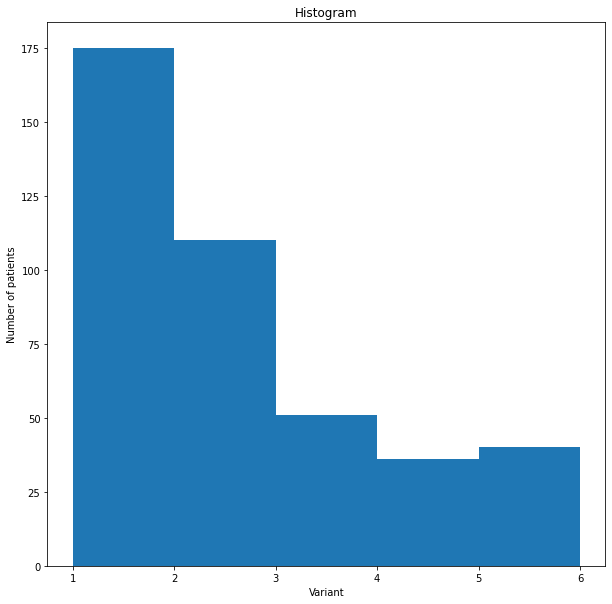

In [ ]:
fig, ax = plt.subplots(figsize =(10, 10))
ax.hist(y, bins = 5)
plt.ylabel('Number of patients')
plt.xlabel('Variant')
plt.title('Histogram')